In [1]:
from onix.data_tools import get_experiment_data
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def get_data(data_number):
    data, headers = get_experiment_data(data_number) # 525307, 525310
    adc_interval = headers['adc_interval']
    data_length = headers['data_length']
    repeats = headers['repeats']
    N = 5000
    transient_time = 0.01 # [s]
    avgs_dict = {}
    
    new_data_dict = {}
    arrays_per_group = 50
    
    for i in range(0, repeats//arrays_per_group):
        temp = np.array([])
        for j in range(0, arrays_per_group):
            m = 10*i+j
            temp = np.append(temp, data[str(m)])
        new_data_dict[str(i)] = temp

    times = np.linspace(0, arrays_per_group*data_length*adc_interval, arrays_per_group*data_length)

    for i, data_array in new_data_dict.items():
        avgs_dict[i] = np.zeros_like(data_array)
        for j in range(data_array.size):
            avgs_dict[i][j] = np.mean(data_array[max(j-N, 0):j+1])
        avgs_dict[i] = avgs_dict[i][times > transient_time] # cutting out transients
        avgs_dict[i] -= np.mean(avgs_dict[i])
    
    times = times[times>transient_time]  

    fft_dict = {i: np.fft.rfft(sample) for i, sample in avgs_dict.items()}
    freqs = np.fft.rfftfreq(avgs_dict['0'].size, adc_interval)

    time_per_group = data_length*adc_interval*(arrays_per_group)
    for k, ffts in fft_dict.items():
        # avgs_array = avgs_dict[str(k)]
        # plt.plot(times, avgs_array)
        k = int(k)
        if k >= 1:
            break
        ffts = ffts[7489:15000]
        plt.loglog(freqs[7489:15000], np.abs(ffts), label=f'{round(time_per_group*k, 2)}s to {round(time_per_group*(k+1), 2)}s')
        
    
    title_str = {
    525312: "mic next to pulse tube",
    525313: "mic on top of pulse tube",
    525450:  "mic to the side of the fridge"
    }
    
    # plt.xticks(freqs[7489:15000], rotation=90)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('signal amplitude')
    plt.title(f"{data_number} - {title_str[data_number]}")
    plt.legend()
    plt.grid()
    plt.show()


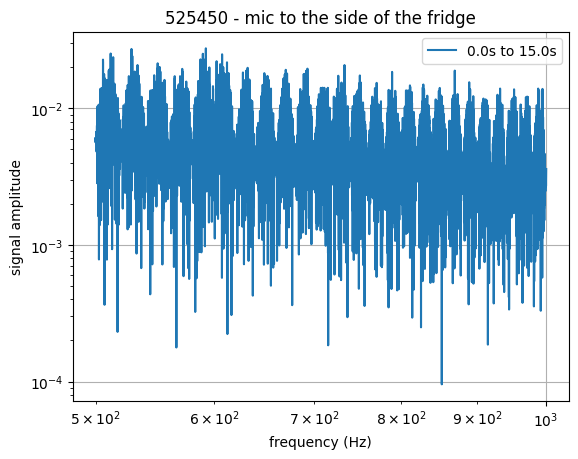

In [46]:
get_data(525450)

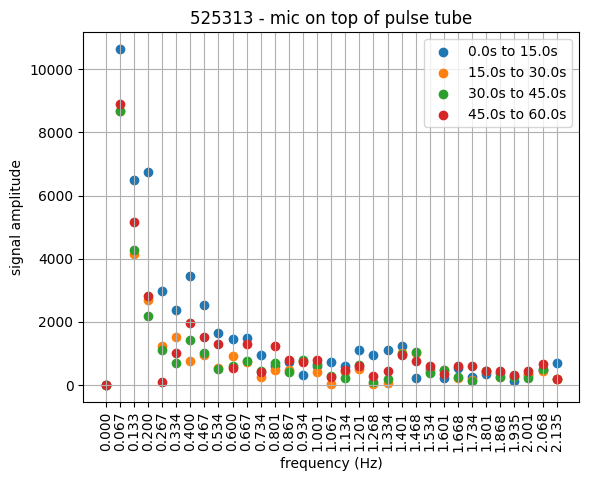

In [26]:
get_data(525313)

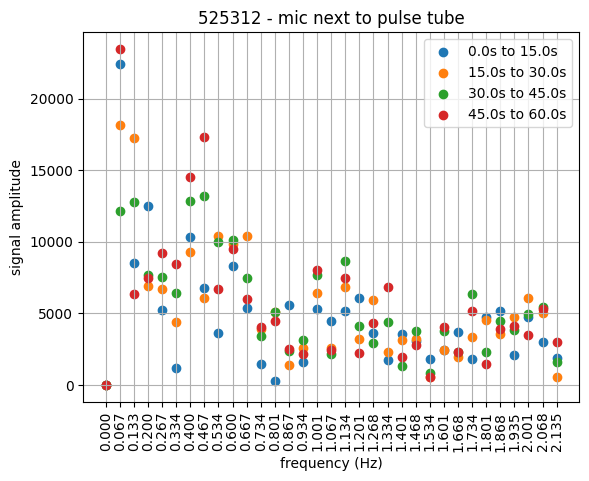

In [27]:
get_data(525312)

In [50]:
data, headers = get_experiment_data(525307) # 525307, 525310
adc_interval = headers['adc_interval']
data_length = headers['get_data_length']
repeats = headers['n_times_data']
N = 5000
transient_time = 0.01 # [s]
avgs_dict = {}

new_data_dict = {}
arrays_per_group = 50

for i in range(0, repeats//arrays_per_group):
    temp = np.array([])
    for j in range(0, arrays_per_group):
        m = 10*i+j
        temp = np.append(temp, data[str(m)])
    new_data_dict[str(i)] = temp


In [54]:
# averaging
times = np.linspace(0, arrays_per_group*data_length*adc_interval, arrays_per_group*data_length)

for i, data_array in new_data_dict.items():
    avgs_dict[i] = np.zeros_like(data_array)
    for j in range(data_array.size):
        avgs_dict[i][j] = np.mean(data_array[max(j-N, 0):j+1])
    # avgs_dict[i] = avgs_dict[i][times > transient_time] # cutting out transients
    # avgs_dict[i] -= np.mean(avgs_dict[i])

# times = times[times>transient_time]

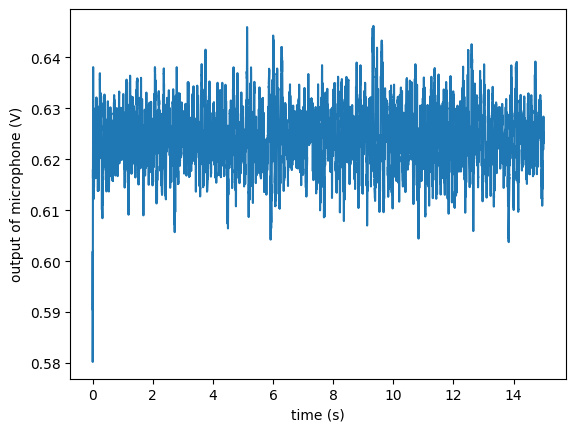

In [56]:
plt.plot(times, avgs_dict['0'])
plt.xlabel('time (s)')
plt.ylabel('output of microphone (V)')
plt.show()

In [4]:
# fft
fft_dict = {i: np.fft.rfft(sample) for i, sample in avgs_dict.items()}
freqs = np.fft.rfftfreq(avgs_dict['0'].size, adc_interval)

for j, k in fft_dict.items():
    print(j, k.size)

print(freqs[0:50])

0 374501
1 374501
2 374501
3 374501
4 374501
5 374501
6 374501
7 374501
[0.         0.13351135 0.2670227  0.40053405 0.53404539 0.66755674
 0.80106809 0.93457944 1.06809079 1.20160214 1.33511348 1.46862483
 1.60213618 1.73564753 1.86915888 2.00267023 2.13618158 2.26969292
 2.40320427 2.53671562 2.67022697 2.80373832 2.93724967 3.07076101
 3.20427236 3.33778371 3.47129506 3.60480641 3.73831776 3.87182911
 4.00534045 4.1388518  4.27236315 4.4058745  4.53938585 4.6728972
 4.80640854 4.93991989 5.07343124 5.20694259 5.34045394 5.47396529
 5.60747664 5.74098798 5.87449933 6.00801068 6.14152203 6.27503338
 6.40854473 6.54205607]


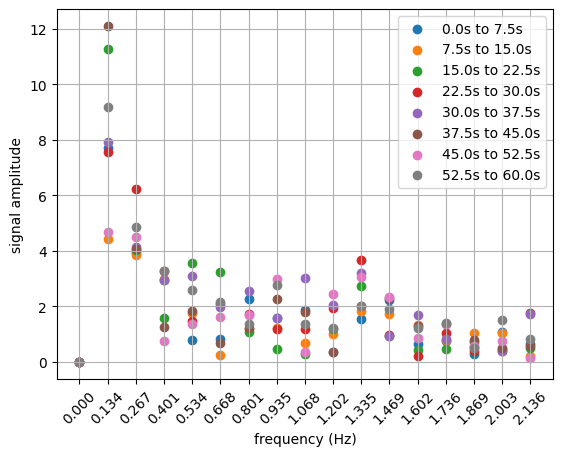

In [5]:
# plotting
time_per_group = data_length*adc_interval*(arrays_per_group)
for k, ffts in fft_dict.items():
    # avgs_array = avgs_dict[str(k)]
    # plt.plot(times, avgs_array)
    k = int(k)
    ffts = ffts[freqs < 2.2]
    plt.scatter(freqs[freqs < 2.2], np.abs(ffts), label=f'{round(time_per_group*k, 2)}s to {round(time_per_group*(k+1), 2)}s')

plt.xticks(freqs[freqs < 2.2], rotation=45)
plt.xlabel('frequency (Hz)')
plt.ylabel('signal amplitude')
plt.legend()
plt.grid()
plt.show()

In [35]:
np.where(freqs <= 2000)

(array([    0,     1,     2, ..., 14977, 14978, 14979], dtype=int64),)

In [36]:
freqs[7489]
freqs[14979]

1999.8664886515357